In [1]:
# --- BLOQUE 1: IMPORTS + CARGA CSV + VISTA INICIAL ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Opciones de visualización
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

# 👉 Cambia esto si tu archivo tiene otro nombre o ruta
RUTA_CSV = "rendimiento-data.csv"

def cargar_csv(ruta):
    """
    Intenta leer el CSV del MINEDUC probando separador y codificación más comunes.
    """
    intentos = [
        {"sep": ";", "encoding": "utf-8"},
        {"sep": ";", "encoding": "latin1"},
        {"sep": ",", "encoding": "utf-8"},
    ]
    ultimo_error = None
    for cfg in intentos:
        try:
            df = pd.read_csv(ruta, low_memory=False, **cfg)
            print(f"✅ Cargado con sep='{cfg['sep']}', encoding='{cfg['encoding']}'")
            return df
        except Exception as e:
            ultimo_error = e
    raise RuntimeError(f"No se pudo leer el CSV. Último error:\n{ultimo_error}")

# Cargar
df = cargar_csv(RUTA_CSV)

# Normalizamos nombres de columnas a MAYÚSCULAS (el MINEDUC suele usar así en la documentación)
df.columns = [c.upper() for c in df.columns]

print("Forma del dataset:", df.shape)
print("\nPrimeras columnas:", list(df.columns[:20]))

# Muestra 5 filas aleatorias para chequear contenido real
df.sample(5, random_state=42)


✅ Cargado con sep=';', encoding='utf-8'
Forma del dataset: (3568930, 38)

Primeras columnas: ['AGNO', 'RBD', 'DGV_RBD', 'NOM_RBD', 'COD_REG_RBD', 'NOM_REG_RBD_A', 'COD_PRO_RBD', 'COD_COM_RBD', 'NOM_COM_RBD', 'COD_DEPROV_RBD', 'NOM_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB', 'NOMBRE_SLEP', 'COD_ENSE', 'COD_ENSE2', 'COD_GRADO', 'LET_CUR']


,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,NOM_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,ESTADO_ESTAB,NOMBRE_SLEP,COD_ENSE,COD_ENSE2,COD_GRADO,LET_CUR,COD_JOR,COD_TIP_CUR,COD_DES_CUR,MRUN,GEN_ALU,FEC_NAC_ALU,EDAD_ALU,COD_REG_ALU,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
3478504,2024,31498,6,ESC. ESPECIAL Nº 2413 LEYENDA DE NIÑOS,13,RM,131,13107,HUECHURABA,137,SANTIAGO NORTE,3,2,0,1,,214,4,23,A,1,0,0,27050626,2,202004,4,13,13107,HUECHURABA,0,0,0,0,87,P,P,0
287271,2024,1291,2,COLEGIO JOSE AGUSTIN GOMEZ,5,VALPO,57,5701,SAN FELIPE,52,SAN FELIPE,3,2,0,1,,110,2,6,A,1,0,0,22326276,1,201202,12,5,5701,SAN FELIPE,0,0,0,6,95,P,P,0
2532906,2024,16462,3,LICEO MONSEÑOR CARLOS GONZÁLEZ CRUCHAGA,7,MAULE,71,7101,TALCA,72,TALCA,3,2,0,1,,410,7,3,B,3,0,1,1594599,2,200803,16,7,7101,TALCA,400,410,41005,"5,8",76,P,P,41005003
1558904,2024,9312,2,CHILEAN EAGLES COLLEGE LAS VIZCACHAS,13,RM,132,13201,PUENTE ALTO,136,CORDILLERA,3,2,0,1,,310,5,3,A,3,0,0,22864135,1,200708,16,13,13110,LA FLORIDA,0,0,0,"6,8",95,P,P,0
1266187,2024,8365,8,LICEO SAN FELIPE BENICIO DE COYHAIQUE,11,AYSEN,111,11101,COYHAIQUE,111,COYHAIQUE,3,2,0,1,,110,2,7,C,3,0,0,5697897,2,201112,12,11,11101,COYHAIQUE,0,0,0,"6,1",78,P,P,0


In [2]:
# --- BLOQUE 2: Exploración de columnas y revisión de variables clave ---

# Ver todas las columnas (hasta 50)
print("📋 Columnas disponibles:\n")
print(list(df.columns))

# Revisión de columnas críticas para el modelo
claves = ["SIT_FIN", "PROM_GRAL", "ASISTENCIA", "GEN_ALU", "EDAD_ALU"]
print("\n🔍 Presencia de columnas clave:")
for c in claves:
    print(f"{c}: {'✅' if c in df.columns else '❌'}")

# Muestra algunas filas con esas columnas (si existen)
columnas_a_ver = [c for c in claves if c in df.columns]
if columnas_a_ver:
    print("\nEjemplo de datos relevantes:")
    display(df[columnas_a_ver].sample(10, random_state=1))
else:
    print("⚠️ Ninguna de las columnas críticas fue encontrada.")


📋 Columnas disponibles:

['AGNO', 'RBD', 'DGV_RBD', 'NOM_RBD', 'COD_REG_RBD', 'NOM_REG_RBD_A', 'COD_PRO_RBD', 'COD_COM_RBD', 'NOM_COM_RBD', 'COD_DEPROV_RBD', 'NOM_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB', 'NOMBRE_SLEP', 'COD_ENSE', 'COD_ENSE2', 'COD_GRADO', 'LET_CUR', 'COD_JOR', 'COD_TIP_CUR', 'COD_DES_CUR', 'MRUN', 'GEN_ALU', 'FEC_NAC_ALU', 'EDAD_ALU', 'COD_REG_ALU', 'COD_COM_ALU', 'NOM_COM_ALU', 'COD_RAMA', 'COD_SEC', 'COD_ESPE', 'PROM_GRAL', 'ASISTENCIA', 'SIT_FIN', 'SIT_FIN_R', 'COD_MEN']

🔍 Presencia de columnas clave:
SIT_FIN: ✅
PROM_GRAL: ✅
ASISTENCIA: ✅
GEN_ALU: ✅
EDAD_ALU: ✅

Ejemplo de datos relevantes:


,SIT_FIN,PROM_GRAL,ASISTENCIA,GEN_ALU,EDAD_ALU
3024955,Y,0,0,2,14
3532062,P,"6,2",97,1,13
2267059,P,"5,9",96,1,10
5619,P,5,89,1,14
1554215,P,"4,9",83,1,16
1728475,P,"5,7",98,2,16
2545254,P,"4,6",85,2,14
2887225,P,"6,7",92,1,9
2030524,P,"6,7",84,2,13
2039415,P,"6,8",85,1,6


In [3]:
# --- BLOQUE 3: Limpieza y creación de variable objetivo (RIESGO) ---

# 1. Filtramos solo columnas necesarias
columnas_usadas = ["AGNO", "SIT_FIN", "PROM_GRAL", "ASISTENCIA", "GEN_ALU", "EDAD_ALU"]
df_model = df[columnas_usadas].copy()

# 2. Eliminamos filas sin datos esenciales
df_model = df_model.dropna(subset=["SIT_FIN", "PROM_GRAL", "ASISTENCIA"])

# 3. Convertimos a numérico (donde corresponda)
df_model["PROM_GRAL"] = pd.to_numeric(df_model["PROM_GRAL"], errors="coerce")
df_model["ASISTENCIA"] = pd.to_numeric(df_model["ASISTENCIA"], errors="coerce")
df_model["EDAD_ALU"] = pd.to_numeric(df_model["EDAD_ALU"], errors="coerce")

# 4. Mapeamos situación final -> variable objetivo
# P = Promovido → 0
# R = Reprobado o Y = Retirado → 1
df_model = df_model[df_model["SIT_FIN"].isin(["P", "R", "Y"])]
df_model["RIESGO"] = df_model["SIT_FIN"].map({"P": 0, "R": 1, "Y": 1})

# 5. Eliminamos filas con valores faltantes después del mapeo
df_model = df_model.dropna()

# 6. Comprobamos distribución de clases
print("Distribución de clases RIESGO (0=Promovido, 1=Riesgo):")
print(df_model["RIESGO"].value_counts(normalize=True).round(3) * 100)

# 7. Vista previa final
df_model.sample(10, random_state=42)


Distribución de clases RIESGO (0=Promovido, 1=Riesgo):
RIESGO
0    54.6
1    45.4
Name: proportion, dtype: float64


,AGNO,SIT_FIN,PROM_GRAL,ASISTENCIA,GEN_ALU,EDAD_ALU,RIESGO
2931548,2024,P,0.0,100,1,5.0,0
1976802,2024,P,6.0,81,1,12.0,0
233973,2024,Y,0.0,0,2,15.0,1
78401,2024,Y,0.0,0,1,9.0,1
3037104,2024,P,6.0,85,2,13.0,0
2046188,2024,P,6.0,81,1,6.0,0
3510964,2024,Y,0.0,0,2,15.0,1
59175,2024,Y,0.0,0,2,15.0,1
2787907,2024,P,6.0,91,2,16.0,0
2042682,2024,Y,0.0,0,2,15.0,1


In [4]:
# --- BLOQUE 4: División temporal anti-fuga ---

# Años disponibles
print("Años disponibles en el dataset:", sorted(df_model["AGNO"].unique()))

# División temporal
train = df_model[df_model["AGNO"] < 2024].copy()
test = df_model[df_model["AGNO"] == 2024].copy()

# Si solo hay 2024 (no hay históricos), usamos un split aleatorio
if train.empty:
    print("⚠️ Solo existen datos de 2024 — se aplicará un 80/20 split aleatorio.")
    from sklearn.model_selection import train_test_split
    train, test = train_test_split(df_model, test_size=0.2, random_state=42)

# Variables predictoras y target
X_train = train[["PROM_GRAL", "ASISTENCIA", "GEN_ALU", "EDAD_ALU"]]
y_train = train["RIESGO"]

X_test = test[["PROM_GRAL", "ASISTENCIA", "GEN_ALU", "EDAD_ALU"]]
y_test = test["RIESGO"]

print(f"📊 Train: {X_train.shape[0]} registros | Test: {X_test.shape[0]} registros")

# Verificamos proporción de clases
print("\nDistribución en TRAIN:")
print(y_train.value_counts(normalize=True).round(3) * 100)
print("\nDistribución en TEST:")
print(y_test.value_counts(normalize=True).round(3) * 100)


Años disponibles en el dataset: [2024]
⚠️ Solo existen datos de 2024 — se aplicará un 80/20 split aleatorio.
📊 Train: 592994 registros | Test: 148249 registros

Distribución en TRAIN:
RIESGO
0    54.6
1    45.4
Name: proportion, dtype: float64

Distribución en TEST:
RIESGO
0    54.7
1    45.3
Name: proportion, dtype: float64


Fase Entrenamiento y evaluación del modelo (Logistic Regression)

Aquí viene lo bueno:
vamos a entrenar el modelo base (LogisticRegression), preprocesar los datos con StandardScaler y evaluar con las métricas exigidas por el hackathon:

Accuracy

Precision

Recall

F1-score

Matriz de confusión

📊 Resultados del modelo Logistic Regression:

Accuracy : 0.949
Precision: 0.918
Recall   : 0.976
F1-score : 0.946


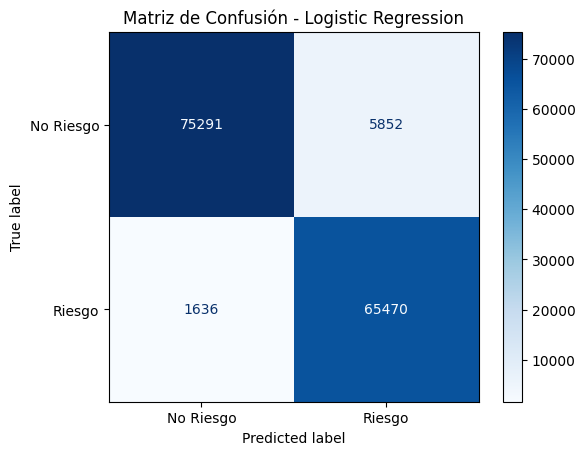

In [5]:
# --- BLOQUE 5: Entrenamiento y evaluación del modelo base ---

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# 1. Definimos el pipeline (escalado + regresión)
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, random_state=42))
])

# 2. Entrenamiento
pipeline.fit(X_train, y_train)

# 3. Predicción
y_pred = pipeline.predict(X_test)

# 4. Evaluación
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Resultados del modelo Logistic Regression:\n")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")

# 5. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Riesgo", "Riesgo"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión - Logistic Regression")
plt.show()
